## 决策树
### 决策树的一个重要任务是为了数据中所蕴含的知识信息
- 决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，在这些机器根据数据集创建规则时，就是机器学习的过程
- k-近邻算法可以完成很多分类任务，但是它最大的缺点就是无法给出数据的内在含义，决策树的主要优势就在于数据形式非常容易理解

#### 决策数的构造
- 优点：计算复杂度不高，输出结果易于理解，对中间值对缺失不敏感，可处理不相关特征数据
- 缺点：可能会产生过度匹配的问题
- 适用数据类型：数值型和 标称型

**构建决策树的第一个问题：当前数据集上哪个特征在划分数据分类时起决定性作用**
- 为了找到决定性的特征，划分出最好的结果，我们必须评估每个特征。
- 完成测试之后，原始数据集就被划分为几个数据子集
- 这些数据子集会分布在第一个决策点的所有分支上。如果某个分支下的数据属于同一类型，则当前条件已经正确地划分数据分类， 无需进一步对数据集进行分割。
- 如果数据子集内的数据不属于同一类型，则需要重复划分数据子集的过程

**思路**
检测数据集中的每个子项是否属于同一分类: 
    If so return 类标签;
    Else
        寻找划分数据集的最好特征
        划分数据集
        创建分支节点
            for 每个划分的子集 
                调用函数createBranch并增加返回结果到分支节点中
        return 分支节点

**决策树的一般流程**
1. 收集数据：可使用任何方法
2. 准备数据：构造算法只适用于标称型数据， 因此数值型数据必须离散化
3. 分析数据：可使用任何方法，构造树完成后，应检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误概率
6. 使用算法：此步骤可以适用于任何监督学习算法，决策树可以更好地理解数据的内在含义

#### 信息增益(information gain)和香农熵/熵(entropy)

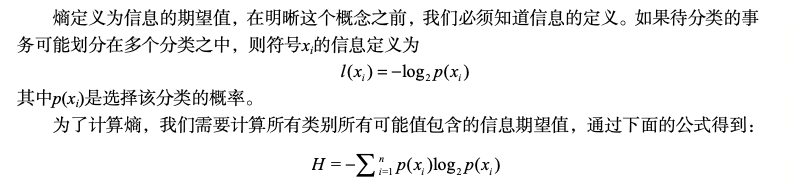

另一个度量集合无序程度的方法是基尼不纯度1(Gini impurity)，简单地说就是从一个数据集中随机选取子项，度量其被错误分类到其他分组里的概率

In [1]:
from math import log

In [2]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    # 为所有可能分类创建字典
    labelCounts= {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)   # 以 2为底求对数
    return shannonEnt     

In [3]:
def createDataSet():
    dataSet = [
        [1,1,'yes'],
        [1,1,'yes'],
        [1,0,'no'],
        [0,1,'no'],
        [0,1,'no']
    ]  
    labels = ['no surfacing','flippers']
    return dataSet ,labels

In [4]:
myData, labels = createDataSet()

In [5]:
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
labels

['no surfacing', 'flippers']

In [7]:
calcShannonEnt(myData)

0.9709505944546686

熵越高，则混合的数据也越多

In [8]:
myData[0][-1] = 'maybe'
myData

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [9]:
 calcShannonEnt(myData)

1.3709505944546687

#### 划分数据集

- 分类算法除了需要测量信息熵，还需要划分数据集， 度量划分数据集的熵，以便判断当前是否正确地划分了数据集
- 将对每个特征划分数 据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式

In [10]:
# 按照给定特征划分数据集
# 输入参数： 待划分待数据集、划分数据集的特征、需要返回的特征的值
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        print("featVec",featVec)
        if featVec[axis] == value:
            print("axis",axis,"featVec[axis]",featVec[axis])
            reducedFeatVec = featVec[:axis]
            print("axis",axis,"reducedFeatVec:",reducedFeatVec)
            reducedFeatVec.extend(featVec[axis+1:])
            print("featVec[axis+1:]",featVec[axis+1:])
            print("axis",axis,"reducedFeatVec:",reducedFeatVec)
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [11]:
myData, labels = createDataSet()

In [12]:
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [13]:
labels

['no surfacing', 'flippers']

In [14]:
splitDataSet(myData,0,1)

featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 0, 'no']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [0, 'no']
axis 0 reducedFeatVec: [0, 'no']
featVec [0, 1, 'no']
featVec [0, 1, 'no']


[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [15]:
splitDataSet(myData,0,0)

featVec [1, 1, 'yes']
featVec [1, 1, 'yes']
featVec [1, 0, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']


[[1, 'no'], [1, 'no']]

In [16]:
# 测试
a = [1,2,3]
b = [4,5,6]
a.append(b)
a

[1, 2, 3, [4, 5, 6]]

In [17]:
# 测试
a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [ ]:
# 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calacShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        print(featList)
        
        uniqueVals =  set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i ,value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calacShannonEnt(subDataSet)
        